In [1]:
!pip install scikit-fuzzy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

# Fungsi Segitiga
def triangular(x, a, b, c):
  if x <= a or x >= c: return 0.0
  elif x == b: return 1.0
  elif a < x < b: return (x-a)/(b-a)
  elif b < x < c: return (c-x)/(c-b)

In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.membership as mf

In [4]:
df_agro = pd.DataFrame({
    'ID': ['P1', 'P2', 'P3'],
    'KA': [18, 25, 12],        # kadar air
    'Ukuran': [210, 180, 250]  # gram
})
df_agro

,ID,KA,Ukuran
0,P1,18,210
1,P2,25,180
2,P3,12,250


In [5]:
# Range Variabel
x_ka = np.arange(0, 41, 1)      # kadar air 0 - 40
x_uk = np.arange(100, 301, 1)   # ukuran 100 - 300 g

# Membership Functions
ka_rendah = mf.trimf(x_ka, [5, 10, 20])
uk_besar = mf.trimf(x_uk, [180, 220, 260])

In [6]:
def mu(value, x, mf_value):
  return fuzz.interp_membership(x, mf_value, value)

df_agro["mu_KA_rendah"] = df_agro["KA"].apply(lambda v: mu(v, x_ka, ka_rendah))
df_agro["mu_Uk_besar"] = df_agro["Ukuran"].apply(lambda v: mu(v, x_uk, uk_besar))
df_agro["AND"] = df_agro[["mu_KA_rendah", "mu_Uk_besar"]].min(axis = 1)
df_agro

,ID,KA,Ukuran,mu_KA_rendah,mu_Uk_besar,AND
0,P1,18,210,0.2,0.75,0.20
1,P2,25,180,0.0,0.00,0.00
2,P3,12,250,0.8,0.25,0.25


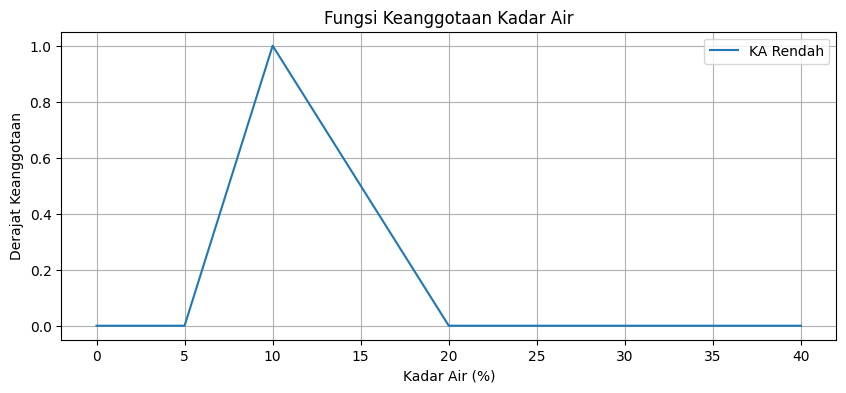

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(x_ka, ka_rendah, label="KA Rendah")
plt.title("Fungsi Keanggotaan Kadar Air")
plt.xlabel("Kadar Air (%)")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()
plt.show()

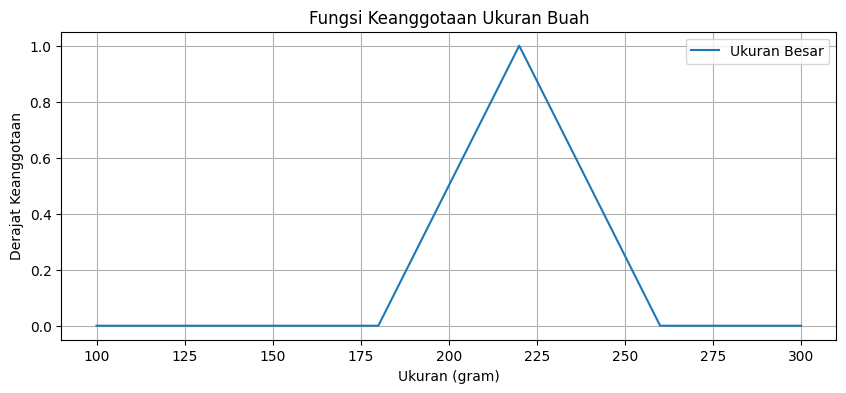

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(x_uk, uk_besar, label="Ukuran Besar")
plt.title("Fungsi Keanggotaan Ukuran Buah")
plt.xlabel("Ukuran (gram)")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()
plt.show()